# Adult Income Dataset

The Adult Income dataset, sourced from the UCI Machine Learning Repository, is a widely-used dataset for studying income prediction based on demographic and employment attributes. It includes census data from individuals, with the goal of determining whether a person earns more than $50,000 annually.

This dataset is commonly used in machine learning for classification tasks, where models are trained to predict income levels (`<=50K` or `>50K`) based on features such as age, education, work class, marital status, and more. It provides an excellent opportunity to explore how different factors influence income and to build predictive models that classify individuals into one of two income groups.

Through analysis, this dataset allows practitioners to examine patterns in income distribution, identify influential features, and evaluate the performance of machine learning algorithms. The presence of categorical and continuous data, as well as the binary classification task, makes this dataset versatile for both educational and research purposes.


### Step 0: Install Necessary Libraries

Before running the notebook, make sure you have all the required Python libraries installed:
- **ucimlrepo**: Fetches datasets from the UCI Machine Learning Repository.
- **pandas**, **numpy**: Handles data manipulation and analysis.
- **matplotlib** and **seaborn**: For creating visualizations.
- **scikit-learn**: Provides tools for splitting datasets and building machine learning models.

Run the following code to install them if they are not already installed.


In [5]:
# Install required libraries
# Install graphviz through graphviz.org, also add to path
%pip install ucimlrepo pandas matplotlib seaborn scikit-learn graphviz

Note: you may need to restart the kernel to use updated packages.


### Step 1: Import Libraries

We begin by importing the necessary libraries for data loading, manipulation, and visualization.

In [4]:
# Import libraries
from ucimlrepo import fetch_ucirepo  # Fetch dataset from UCI repository
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Import libraries for machine learning and data splitting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 2: Loading Dataset and Dataset Information

The **Adult** dataset is fetched from the UCI Machine Learning Repository using the `ucimlrepo` library. 

In [76]:
# Fetch the dataset 
adult_income_data = fetch_ucirepo(id=2)
# Inspect the return type of the dataset
type(adult_income_data)

ucimlrepo.dotdict.dotdict

#### Dataset metadata

In [79]:
adult_income_data.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

#### Check dataset keys

In [82]:
adult_income_data.keys()

dict_keys(['data', 'metadata', 'variables'])

#### Check Dataset Data

In [85]:
adult_income_data.data

{'ids': None,
 'features':        age         workclass  fnlwgt  education  education-num  \
 0       39         State-gov   77516  Bachelors             13   
 1       50  Self-emp-not-inc   83311  Bachelors             13   
 2       38           Private  215646    HS-grad              9   
 3       53           Private  234721       11th              7   
 4       28           Private  338409  Bachelors             13   
 ...    ...               ...     ...        ...            ...   
 48837   39           Private  215419  Bachelors             13   
 48838   64               NaN  321403    HS-grad              9   
 48839   38           Private  374983  Bachelors             13   
 48840   44           Private   83891  Bachelors             13   
 48841   35      Self-emp-inc  182148  Bachelors             13   
 
            marital-status         occupation    relationship  \
 0           Never-married       Adm-clerical   Not-in-family   
 1      Married-civ-spouse    Exec-man

#### Check Dataset Variable Information

In [31]:
# View feature and variables information
adult_income_data.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


#### Extracting Dataset and Converting Dataset to DataFrame

In [122]:
# Extract features and target columns from the dataset
features = adult_income_data['data']['features']  # DataFrame with feature columns
target = adult_income_data['data']['targets']  # DataFrame with the target column

# Rename the target column to 'income' for clarity
target = target.rename(columns={'income': 'income'})

# Encode the target column: <=50K as 0 and >50K as 1
target['income'] = target['income'].apply(lambda x: 0 if '<=50K' in x else 1)

# Combine features and target into a single DataFrame
dataset = pd.concat([features, target], axis=1)

# Verify the combined DataFrame
dataset


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


### Step 4: Data Preprocessing


#### Handling Missing Values

In this step, we clean the dataset by checking for missing values and removing any rows containing missing values.

- **Objective**: Identify rows with missing values and remove them from the dataset.
- **Output**: The total number of rows removed due to missing values.


In [131]:
# Check for missing values and remove rows with any missing values
missing_rows_before = dataset.shape[0]  # Total rows before cleaning
dataset = dataset.dropna()  # Update the dataset after dropping rows with missing values
missing_rows_after = dataset.shape[0]  # Total rows after cleaning

# Calculate the number of rows deleted
rows_deleted = missing_rows_before - missing_rows_after

# Display the result
rows_deleted


0

#### Check for Duplicate Rows

As duplicate rows can introduce bias and redundancy, we use `duplicated()` to identify and remove duplicates.

In [134]:
# Check for duplicate rows
duplicates_before = dataset.duplicated().sum()
dataset = dataset.drop_duplicates()
duplicates_after = dataset.duplicated().sum()

# Calculate the number of duplicates removed
duplicates_removed = duplicates_before - duplicates_after

# Display the result
duplicates_removed

0

#### Encode Categorical Variables

To prepare the dataset for the DecisionTreeClassifier, we need to convert all non-numeric columns into numeric format using label encoding.

In [137]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Initialize label encoder
label_encoders = {}

# Apply label encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Save the encoder for later use if needed

# Display the transformed dataset
dataset.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


### Step 5: Verify Dataset after Data Preprocessing

This is to verify whether your dataset has been successfully preprocessed after performing data preprocessing steps

#### Reset Index

In [175]:
# Reset the index of the dataset and drop the old index
dataset.reset_index(drop=True, inplace=True)

#### Preview final dataset

In [178]:
# Step 1: View the first few rows
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47568,33,4,245211,9,13,4,10,3,4,1,0,0,40,39,0
47569,39,4,215419,9,13,0,10,1,4,0,0,0,36,39,0
47570,38,4,374983,9,13,2,10,0,4,1,0,0,50,39,0
47571,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39,0


The dataset now contains 47,568 rows, as well as all data now is numerical, indicating that the data preprocessing steps have been successfully completed.

### Extract Features and Labels

After fetching and examining the dataset, we will extract:
- **Features**: The numerical columns describing tumor properties.
- **Labels**: The target column, which indicates whether an individual's income exceeds `$50K` per year (`O` for Over `$50K` and `U` for Under or Equal `$50K`).


In [180]:
# Extract features and target (labels)
features = dataset.drop(columns=['income'])  # Remove the 'income' column to keep only features
labels = dataset['income']  # Extract the 'income' column as the target (labels)


Preview `features`

In [183]:
features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47568,33,4,245211,9,13,4,10,3,4,1,0,0,40,39
47569,39,4,215419,9,13,0,10,1,4,0,0,0,36,39
47570,38,4,374983,9,13,2,10,0,4,1,0,0,50,39
47571,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39


Preview `features` size

In [185]:
features.shape

(47573, 14)

Preview `labels`

In [188]:
labels

0        0
1        0
2        0
3        0
4        0
        ..
47568    0
47569    0
47570    0
47571    0
47572    1
Name: income, Length: 47573, dtype: int64

Preview `labels` size

In [156]:
labels.shape

(47573,)

## 2.1. Prepare the dataset for training

We will split the dataset into training and testing subsets with the following proportions:
- **40% Training / 60% Testing**
- **60% Training / 40% Testing**
- **80% Training / 20% Testing**
- **90% Training / 10% Testing**

In [192]:
# Define train-test proportions
train_sizes = [0.4, 0.6, 0.8, 0.9]

# Create a dictionary to store the splits
splits = {}

### Step 1: Perform Stratified Shuffle Split

Using the defined train-test proportions, we will:
1. Split the dataset into `feature_train`, `feature_test`, `label_train`, and `label_test` subsee2s.
3. Store the splits in a dictionary, where each key corresponds to the train-test proportion.


In [195]:
# Import StratifiedShuffleSplit to split the dataset into training and testing subsets
from sklearn.model_selection import StratifiedShuffleSplit


# Perform stratified shuffle split for each proportion
for train_size in train_sizes:
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, random_state=42)
    for train_index, test_index in sss.split(features, labels):
        feature_train = features.iloc[train_index]
        feature_test = features.iloc[test_index]
        label_train = labels.iloc[train_index]
        label_test = labels.iloc[test_index]
    
    # Store the splits in the dictionary
    splits[f'{int(train_size * 100)}/{int(round((1 - train_size) * 100))}'] = {
        'feature_train': feature_train,
        'feature_test': feature_test,
        'label_train': label_train,
        'label_test': label_test
    }


### Step 2: Confirm Splits

We will now verify that the splits were created correctly by:
1. Checking the structure of the dictionary where splits are stored.
2. Displaying a few rows from all the splits to confirm that the data is organized as expected.

In [198]:
# Display the keys of the splits dictionary 
splits.keys()

dict_keys(['40/60', '60/40', '80/20', '90/10'])

## 2.2. Build the decision tree classifiers

We will now train **Decision Tree Classifier** on **training data**.

### Parameters:
- **criterion='entropy'**: The splitting criterion is information gain (entropy).
- **random_state=42**: Ensures reproducibility of the training process.

This classifier will learn to differentiate between malignant and benign tumors based on the training data.

---

### Step 1: Training

Initializes a dictionary to store classifiers and a list to store the shapes of the training and testing datasets for each proportion. The loop iterates through all splits to extract the details for `feature_train`, `feature_test`, `label_train`, and `label_test`. The resulting details are stored in a structured table for better visualization.


In [201]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a dictionary to store classifiers
classifiers = {}

# Initialize a list to store the shapes 
dataset_shapes = []

# Train Decision Tree Classifier for each proportion
for proportion, data in splits.items():
    
    # Extract data
    feature_train = data['feature_train']
    feature_test = data['feature_test']
    label_train = data['label_train']
    label_test = data['label_test']
    
    # Initialize the Decision Tree Classifier
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
    
    # Train the classifier
    clf.fit(feature_train, label_train)
    
    # Store the classifier and split details
    classifiers[proportion] = {
        'classifier': clf,
        'feature_train': feature_train,
        'feature_test': feature_test,
        'label_train': label_train,
        'label_test': label_test
    }
    # Append details to the list
    dataset_shapes.append({
        'Proportion': proportion,
        'Feature Train Shape': feature_train.shape,
        'Feature Test Shape': feature_test.shape,
        'Label Train Shape': label_train.shape,
        'Label Test Shape': label_test.shape
    })


shapes_df = pd.DataFrame(dataset_shapes)

# Display the DataFrame
shapes_df


,Proportion,Feature Train Shape,Feature Test Shape,Label Train Shape,Label Test Shape
0,40/60,"(19029, 14)","(28544, 14)","(19029,)","(28544,)"
1,60/40,"(28543, 14)","(19030, 14)","(28543,)","(19030,)"
2,80/20,"(38058, 14)","(9515, 14)","(38058,)","(9515,)"
3,90/10,"(42815, 14)","(4758, 14)","(42815,)","(4758,)"


### Step 2: Export the Decision Tree to Graphviz Format
We export the trained decisions tree to Graphviz's DOT format, which allows us to visualize the tree structure.


In [271]:
from sklearn.tree import export_graphviz

# Initialize a dictionary to store DOT data for each proportion
dot_files = {}

# Loop through all trained classifiers to export decision trees
for proportion, data in classifiers.items():
    # Extract the classifier and its training data
    clf = data['classifier']
    feature_train = data['feature_train']
    
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        clf,
        out_file=None,  # Do not write to a file
        feature_names=feature_train.columns,  # Feature names
        class_names=['Under', 'Over'],  # Adjust as needed
        filled=True,  # Fill nodes with colors
        rounded=True,  # Use rounded edges
        special_characters=True,  # Allow special characters
        max_depth=5  # Adjust the depth of the tree for visualization
    )
    
    # Store the DOT data
    dot_files[proportion] = dot_data


### Step 3: Visualize the Decision Tree Using Graphviz

The DOT data is converted to an image using Graphviz. This visualization provides a graphical representation of the decision tree:
- Splits based on feature thresholds.
- The reduction in entropy at each split.
- Predicted class and sample counts at leaf nodes.

---

**Decision Tree of 40/60:**

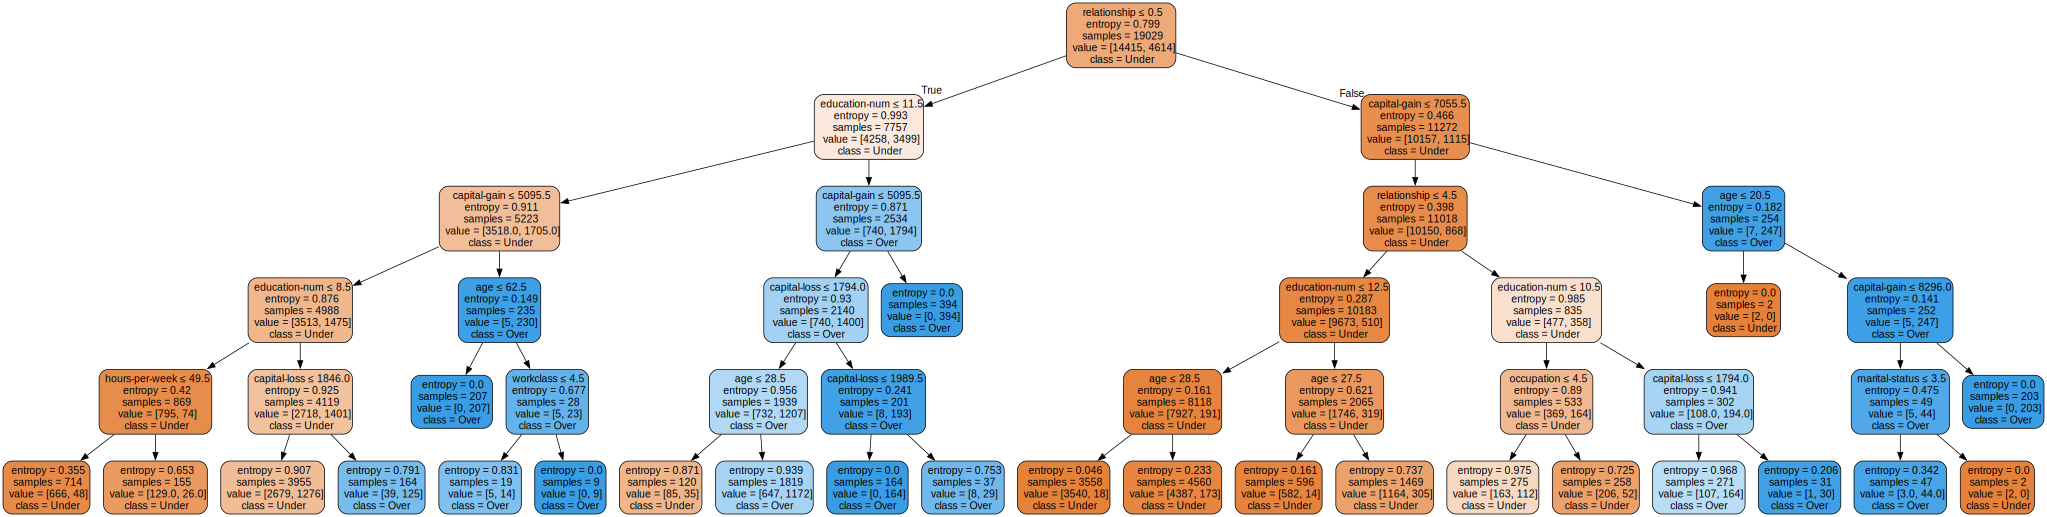

In [279]:
from graphviz import Source

# Render and display using Graphviz
graph = Source(dot_files["40/60"])
graph.render("decision_tree_40_60", format="png", cleanup=True)
graph

**Decision Tree of 60/40:**

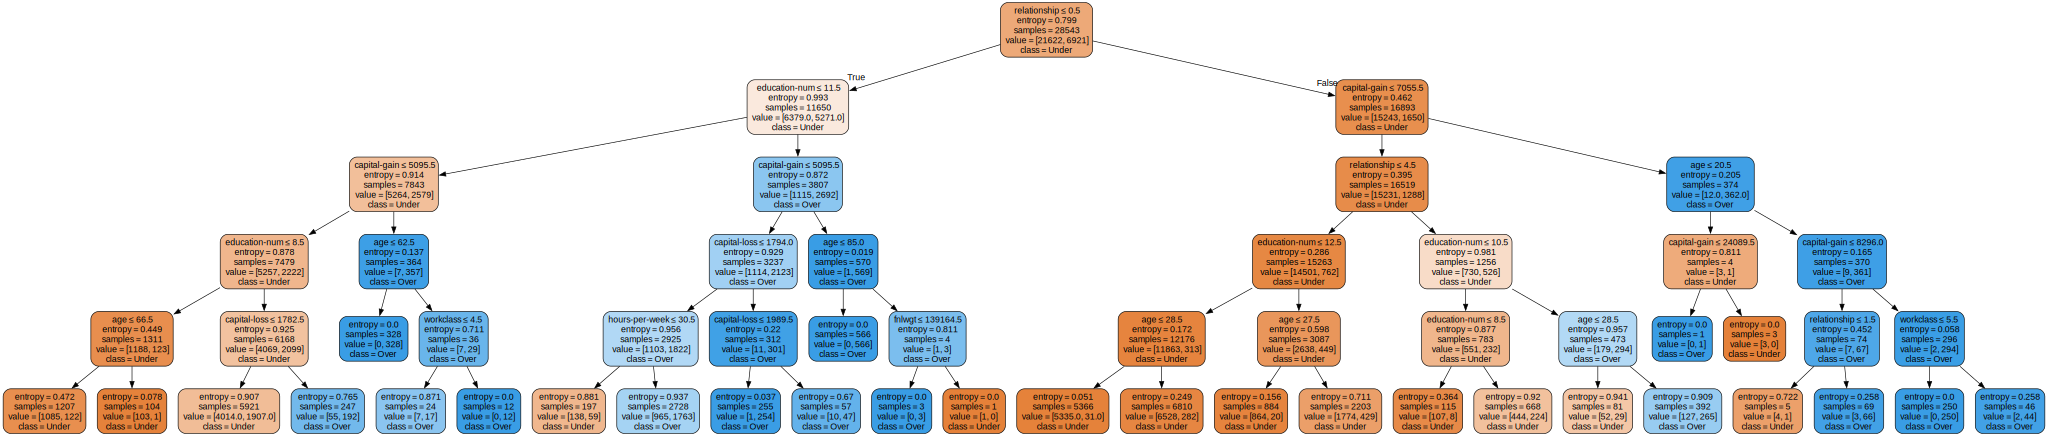

In [281]:
# Render and display using Graphviz
graph = Source(dot_files["60/40"])
graph.render("decision_tree_60_40", format="png", cleanup=True)
graph

**Decision Tree of 80/20:**

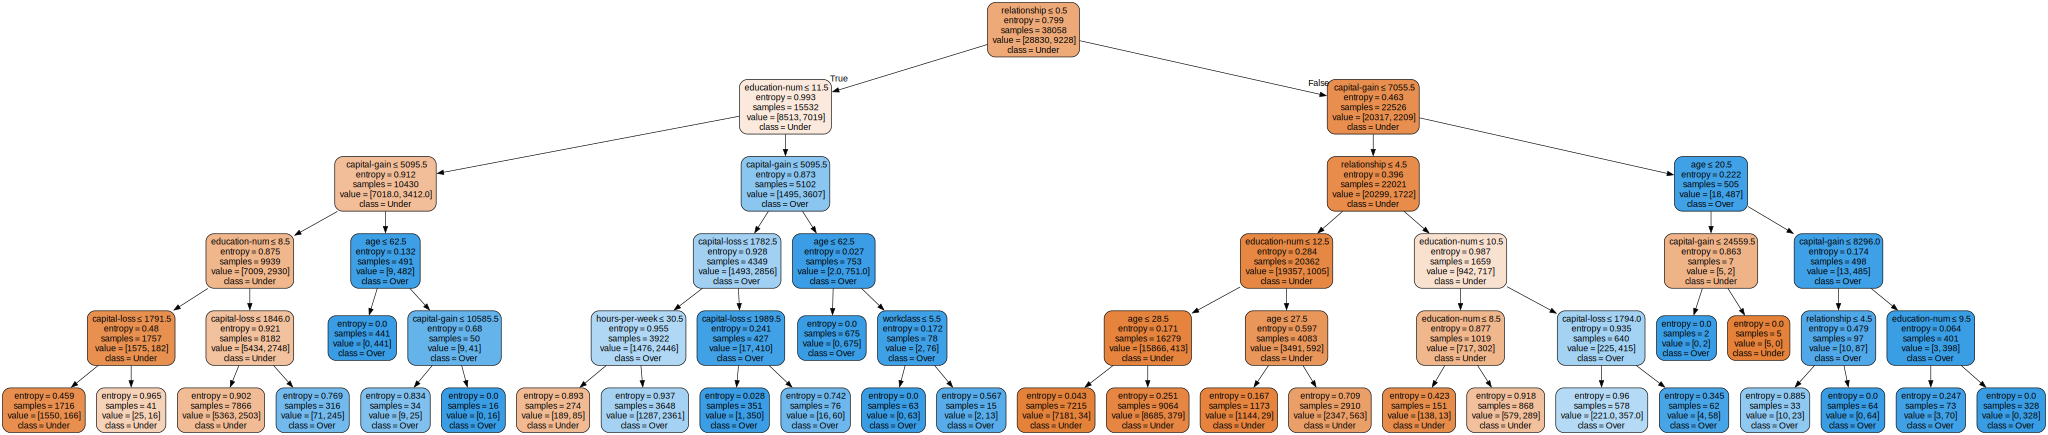

In [283]:
# Render and display using Graphviz
graph = Source(dot_files["80/20"])
graph.render("decision_tree_80_20", format="png", cleanup=True)
graph

**Decision Tree of 90/10:**

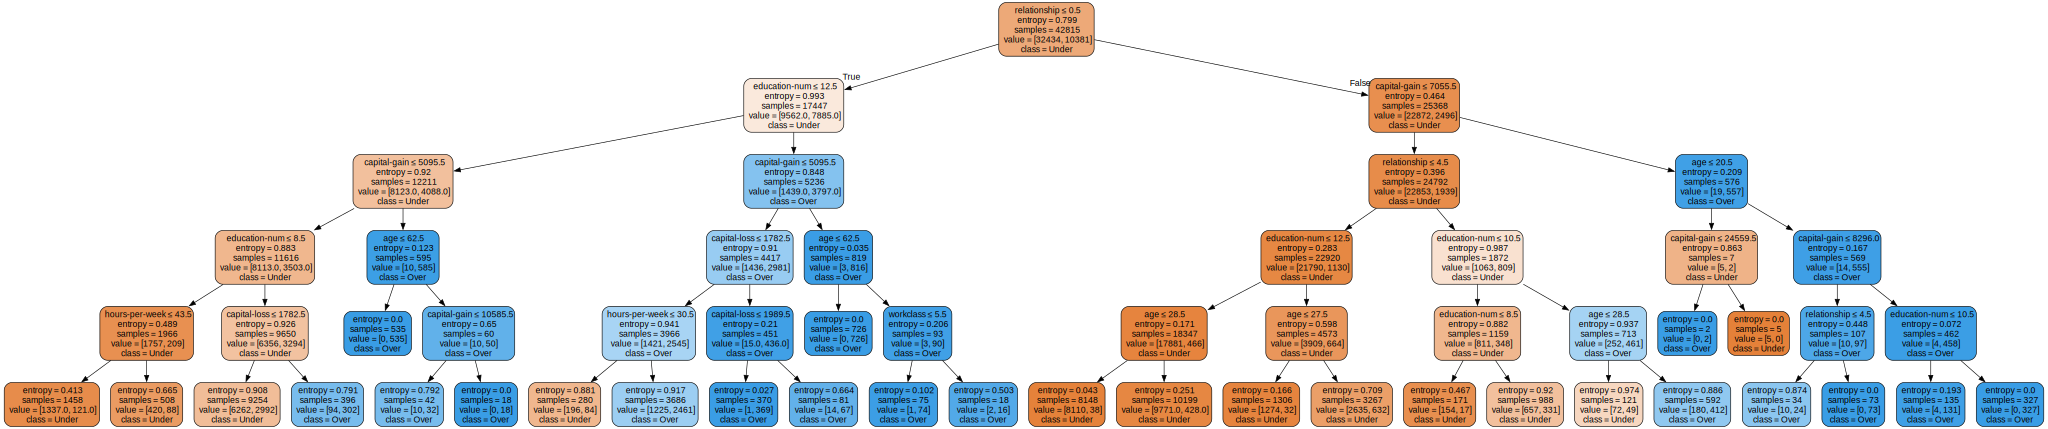

In [286]:
# Render and display using Graphviz
graph = Source(dot_files["90/10"])
graph.render("decision_tree_90_10", format="png", cleanup=True)
graph

## 2.3: Evaluating the Decision Tree Classifier

After training the Decision Tree Classifier, we evaluate its performance on the test set for the **White Wine Quality** dataset. This involves the following tasks:

### **Tasks:**
1. **Make Predictions**:
   - Use the trained Decision Tree model to predict wine quality categories for the testing dataset.
2. **Compute Metrics**:
   - **Accuracy Score**: Measures the overall performance of the classifier by calculating the proportion of correctly predicted samples out of the total.
   - **Confusion Matrix**: Provides a detailed breakdown of True Positives, True Negatives, False Positives, and False Negatives for each quality category (Low Quality, Standard Quality, and High Quality).
   - **Classification Report**: Includes precision, recall, and F1-score for each wine quality category, providing insights into the performance for each class.

The results are visualized using heatmaps for the confusion matrix and tabular displays for the classification report, offering a clear interpretation of the classifier's performance.


In [291]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.display import display, Markdown

def evaluate_proportion(proportion):
    if proportion not in classifiers:
        display(Markdown(f"**Proportion '{proportion}' not found!**"))
        return
    
    # Extract the trained classifier and test data
    data = classifiers[proportion]
    clf = data['classifier']
    feature_test = data['feature_test']
    label_test = data['label_test']
    
    # Make predictions
    predictions = clf.predict(feature_test)
    
    # Compute confusion matrix and classification report
    conf_matrix = confusion_matrix(label_test, predictions)
    class_report = classification_report(
        label_test, predictions, target_names=['Under', 'Over'], output_dict=True
    )
    
    # Display markdown heading
    display(Markdown(f"### Report for the {proportion} Proportion Dataset"))
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(
        conf_matrix, annot=True, fmt='d', cmap="Blues", 
        xticklabels=['Under', 'Over'], 
        yticklabels=['Under', 'Over']
    )
    plt.title(f"Confusion Matrix for {proportion} Dataset")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Display classification report as a table
    display(Markdown("#### Classification Report:"))
    class_report_df = pd.DataFrame(class_report).transpose()
    display(class_report_df)


**Report of Different Proportion Decision Tree Classifiers**

### Report for the 60/40 Proportion Dataset

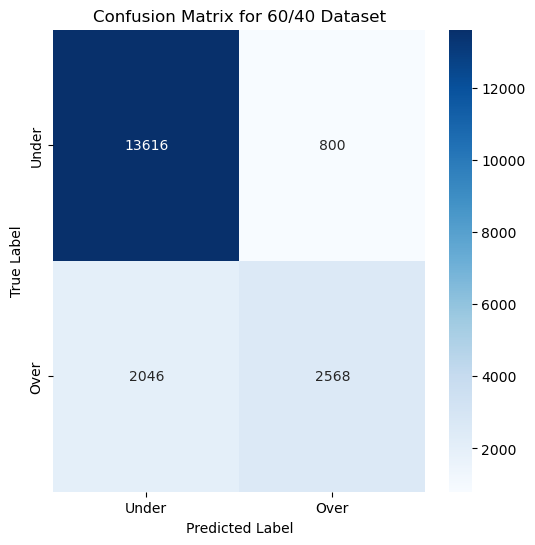

#### Classification Report:

,precision,recall,f1-score,support
Under,0.869365,0.944506,0.905379,14416.000000
Over,0.762470,0.556567,0.643448,4614.000000
accuracy,0.850447,0.850447,0.850447,0.850447
macro avg,0.815918,0.750537,0.774414,19030.000000
weighted avg,0.843448,0.850447,0.841872,19030.000000


In [293]:
evaluate_proportion("60/40")

### Insights for the 60/40 Proportion Dataset

- The classifier achieves excellent recall for the "Under" class (94.45%), ensuring most individuals with incomes ≤50K are correctly identified.
- Precision for the "Over" class (76.25%) reflects a good level of reliability in identifying individuals with incomes >50K, but there is room for improvement.
- Recall for the "Over" class (55.57%) indicates moderate success in correctly identifying individuals with incomes >50K, with a noticeable portion misclassified as "Under."
- The overall accuracy is 85.04%, showcasing strong performance in distinguishing between the "Under" and "Over" income categories.
- The imbalance in the dataset is evident, as indicated by the significantly larger support for the "Under" class (14,416 samples) compared to the "Over" class (4,614 samples), which may influence classifier performance.


### Report for the 40/60 Proportion Dataset

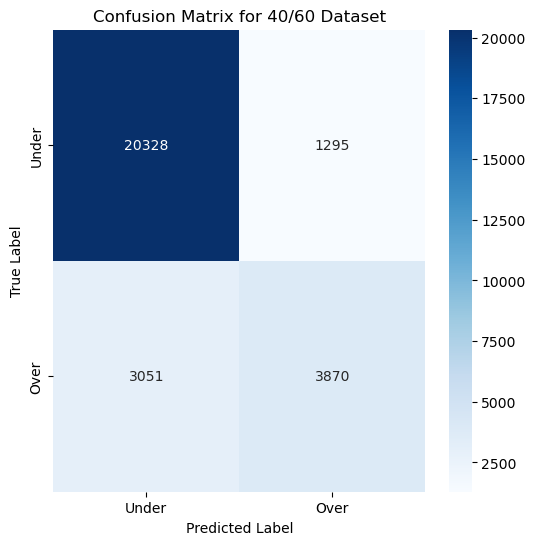

#### Classification Report:

,precision,recall,f1-score,support
Under,0.869498,0.940110,0.903427,21623.000000
Over,0.749274,0.559168,0.640410,6921.000000
accuracy,0.847744,0.847744,0.847744,0.847744
macro avg,0.809386,0.749639,0.771918,28544.000000
weighted avg,0.840348,0.847744,0.839654,28544.000000


In [296]:
evaluate_proportion("40/60")

### Insights for the 40/60 Proportion Dataset

- The classifier maintains high recall for the "Under" class (94.01%), ensuring most individuals with incomes ≤50K are correctly classified.
- Precision for the "Over" class is moderate at 74.93%, indicating that nearly a quarter of the predictions for incomes >50K are misclassified as "Under."
- Recall for the "Over" class remains relatively low at 55.92%, reflecting challenges in identifying individuals with incomes >50K accurately.
- The overall accuracy of 84.77% indicates strong general performance, though the imbalance between the "Under" and "Over" classes is evident, with higher support for the "Under" class (21,623 samples) compared to "Over" (6,921 samples).
- Improvements in identifying the "Over" class could significantly enhance the classifier's utility for income prediction tasks.


### Report for the 80/20 Proportion Dataset

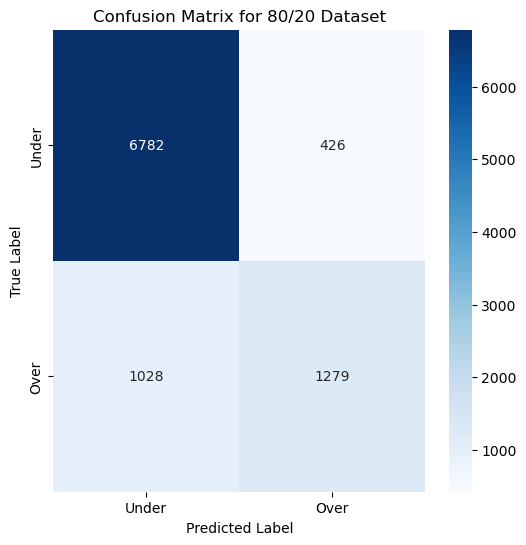

#### Classification Report:

,precision,recall,f1-score,support
Under,0.868374,0.940899,0.903183,7208.000000
Over,0.750147,0.554400,0.637587,2307.000000
accuracy,0.847189,0.847189,0.847189,0.847189
macro avg,0.809260,0.747649,0.770385,9515.000000
weighted avg,0.839709,0.847189,0.838787,9515.000000


In [299]:
evaluate_proportion("80/20")

### Insights for the 80/20 Proportion Dataset

- The classifier achieves a high recall for the "Under" class (94.09%), ensuring the majority of individuals with incomes ≤50K are correctly classified.
- Precision for the "Over" class is 75.01%, indicating a moderate proportion of accurate predictions for individuals earning >50K, with room for improvement.
- Recall for the "Over" class is relatively low at 55.44%, showing challenges in correctly identifying individuals with incomes >50K.
- The overall accuracy of 84.72% demonstrates good performance in distinguishing between income categories, though the imbalance in recall between the "Under" and "Over" classes highlights the need for optimization in identifying higher-income individuals.
- With fewer samples in the "Over" class (2,307) compared to the "Under" class (7,208), the classifier shows a bias towards the majority class.


### Report for the 90/10 Proportion Dataset

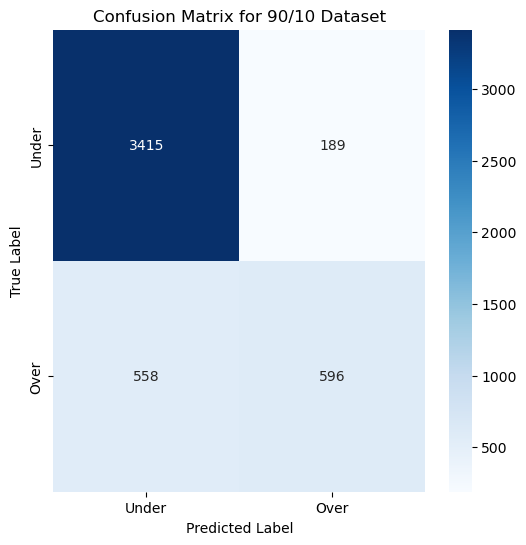

#### Classification Report:

,precision,recall,f1-score,support
Under,0.859552,0.947558,0.901412,3604.000000
Over,0.759236,0.516464,0.614750,1154.000000
accuracy,0.843001,0.843001,0.843001,0.843001
macro avg,0.809394,0.732011,0.758081,4758.000000
weighted avg,0.835221,0.843001,0.831885,4758.000000


In [302]:
evaluate_proportion("90/10")

### Insights for the 90/10 Proportion Dataset

- The model achieves high recall (94.76%) and precision (85.96%) for the "Under" class, indicating strong performance in identifying lower-income individuals.
- Recall for the "Over" class is 51.65%, suggesting challenges in detecting higher-income individuals.
- Overall accuracy is 84.30%, reflecting good general performance but with room for improvement for the minority class.
- Addressing class imbalance could further enhance the model's ability to predict the "Over" class effectively.


### Final Insights Across All Proportions

- **Under Income Classification**: The "Under" class consistently achieves high precision and recall across all splits, with the best performance in the **60/40** and **40/60** proportions.
- **Over Income Challenges**: The "Over" class remains challenging to classify, with lower recall and F1-scores across all splits, reflecting the difficulty in detecting higher-income individuals.
- **Overall Accuracy**: The accuracy remains stable across proportions, ranging from 84.30% to 85.04%, with the **60/40** split providing the best balance between precision and recall.
- **Impact of Training Size**: Larger training proportions (e.g., **60/40** and **80/20**) yield slightly better performance for the minority "Over" class, whereas smaller proportions (e.g., **90/10**) show reduced recall and precision for this class.


## 2.4. The Depth and Accuracy of a Decision Tree

This task examines how the depth of a decision tree affects its classification accuracy using the **80/20 split**. We will:
1. Train the decision tree classifier for different values of `max_depth`: `[None, 2, 3, 4, 5, 6, 7]`.
2. Visualize the decision trees for each depth using Graphviz.
3. Compute the **accuracy score** on the test set for each depth.
4. Provide charts  on the statistics

In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define depths
depths = [1, 2, 3, 4, 5, 6, 7]

# Extract the 80/20 proportion dataset
feature_train = splits['80/20']['feature_train']
feature_test = splits['80/20']['feature_test']
label_train = splits['80/20']['label_train']
label_test = splits['80/20']['label_test']

# Store accuracy results
accuracy_results = []

# Evaluate the model for each depth
for depth in depths:
    # Train decision tree
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    clf.fit(feature_train, label_train)
    
    # Predict and evaluate accuracy
    predictions = clf.predict(feature_test)
    accuracy = accuracy_score(label_test, predictions)
    accuracy_results.append({'max_depth': depth, 'accuracy': accuracy})


### Decision Trees Visualizations for different `max_depth`
Below are visualizations of the Decision Tree classifier for selected values of `max_depth`. Each visualization highlights how the tree's complexity evolves with increasing depth.


In [312]:
def decision_tree(depth):
    
    # Initialize the Decision Tree Classifier with the specified depth
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    
    # Train the classifier on the training data
    clf.fit(feature_train, label_train)
    
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        clf,
        out_file=None,  # Do not write to a file
        feature_names=feature_train.columns,  # Feature names
        class_names=['Under', 'Over'],  # Replace with your class names
        filled=True,  # Fill nodes with colors
        rounded=True,  # Use rounded edges
        special_characters=True,  # Allow special characters
        max_depth=depth  # Limit the depth for visualization
    )
    
    # Render and save the tree as a PNG
    graph = Source(dot_data)
    graph.render(f"max_depth_{depth}_decision_tree", format="png", cleanup=True)
    return graph

Tree with `max_depth = 1`:

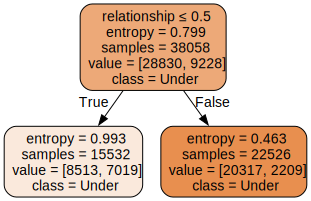

In [318]:
decision_tree(1)

Tree with `max_depth = 2`:

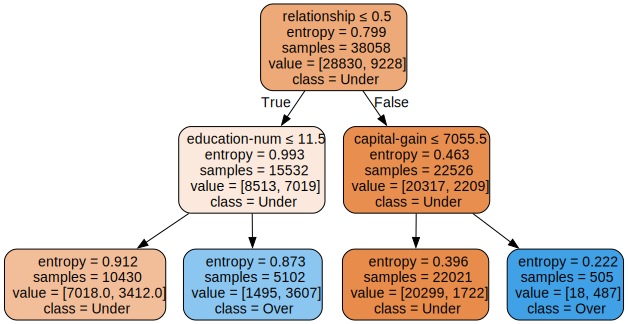

In [339]:
decision_tree(2)

Tree with `max_depth = 3`:

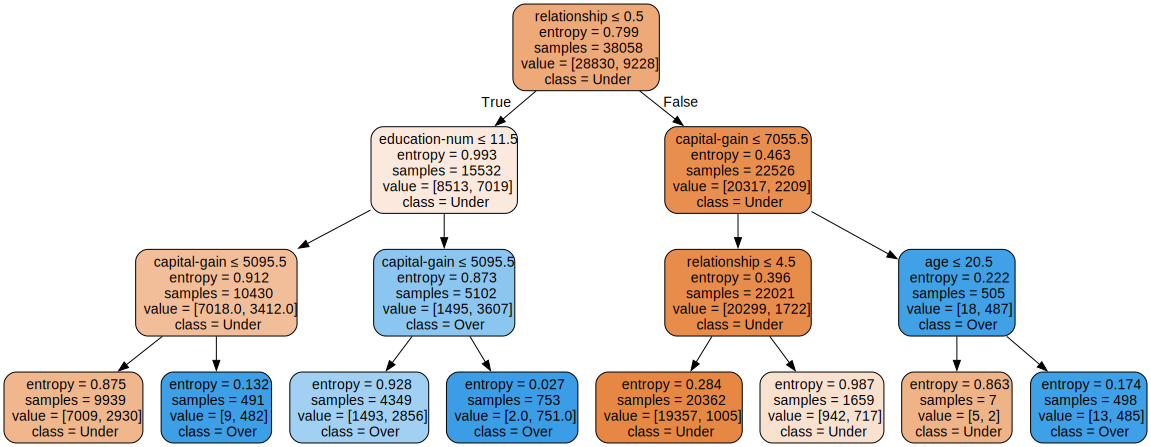

In [341]:
decision_tree(3)

Tree with `max_depth = 4`:

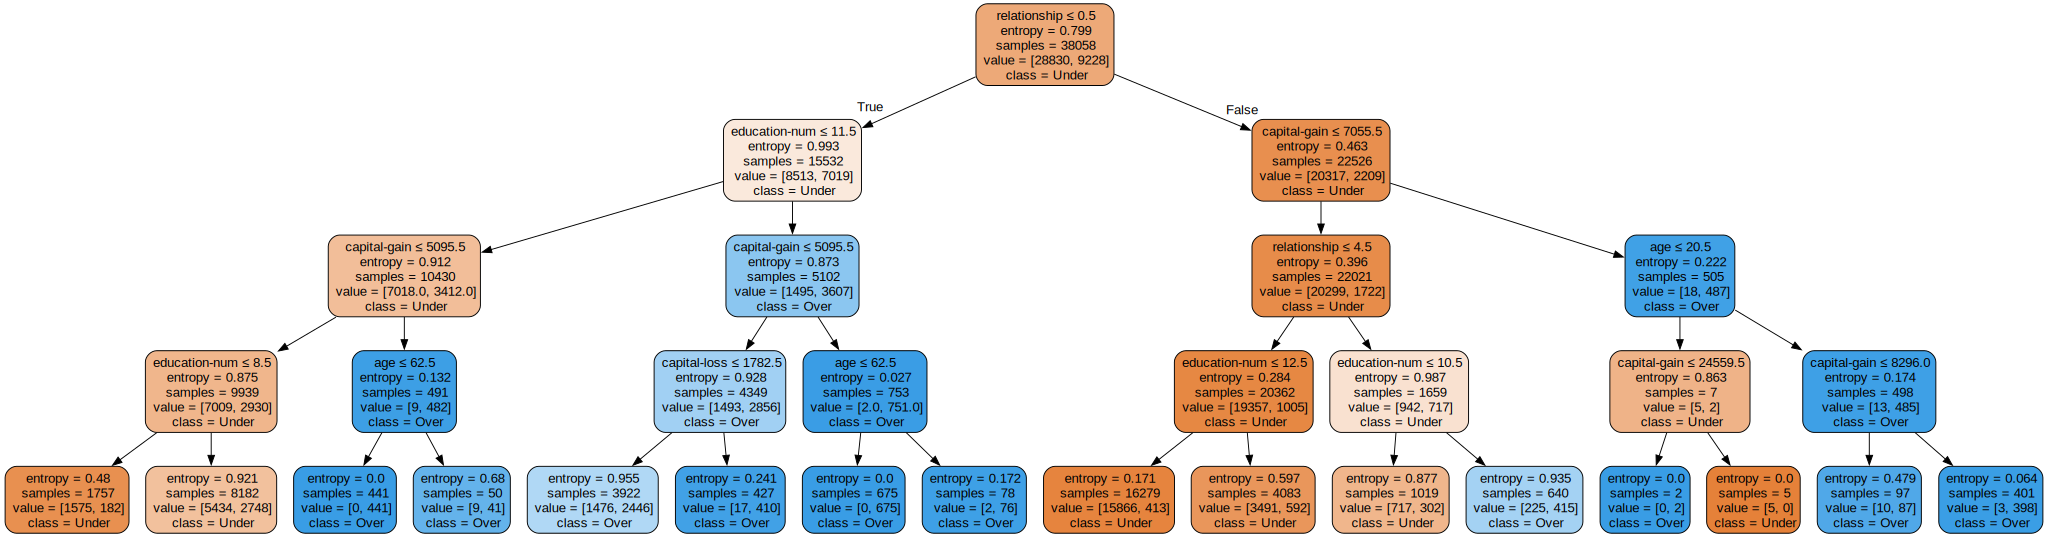

In [343]:
decision_tree(4)

Tree with `max_depth = 5`:

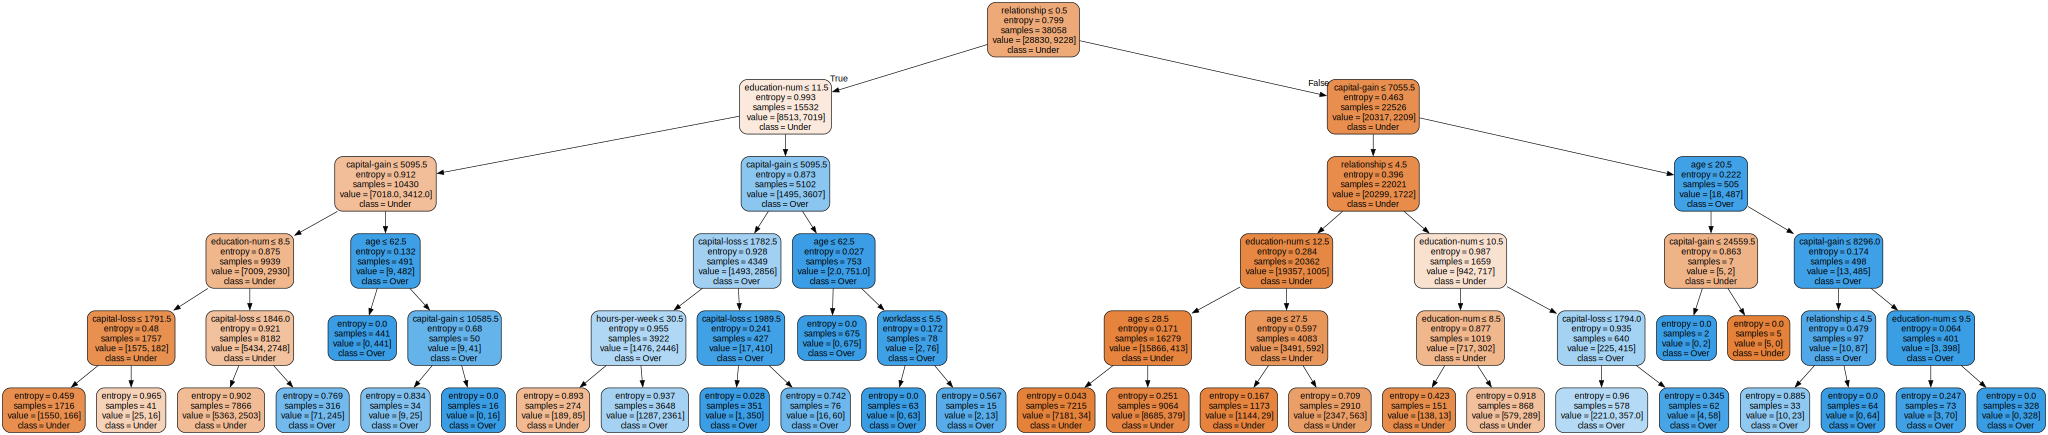

In [345]:
decision_tree(5)

Tree with `max_depth = 6`:

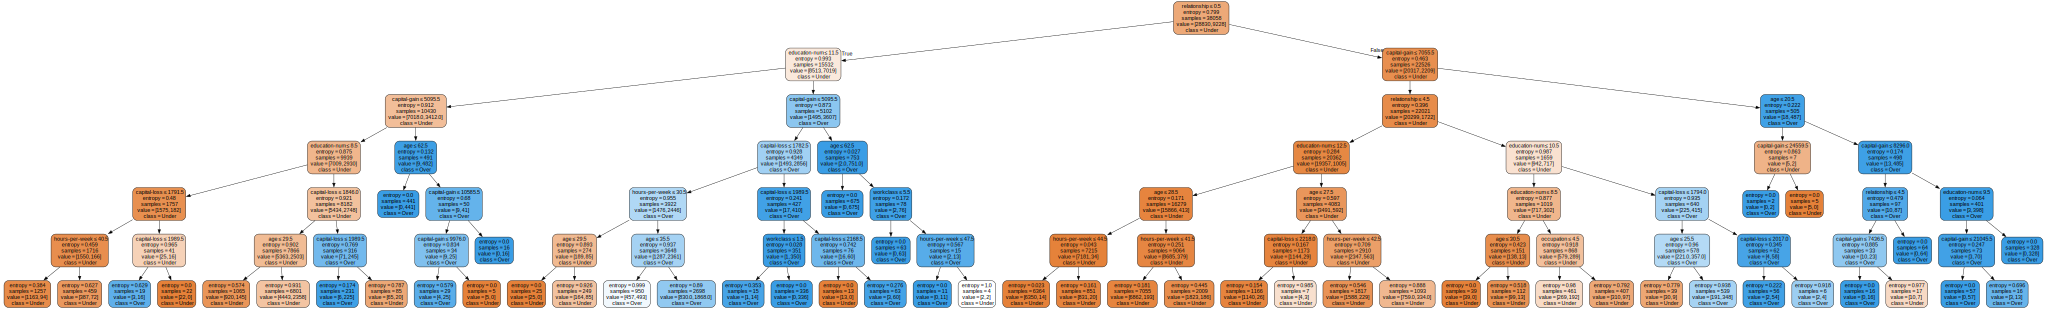

In [347]:
decision_tree(6)

Tree with `max_depth = 7`:

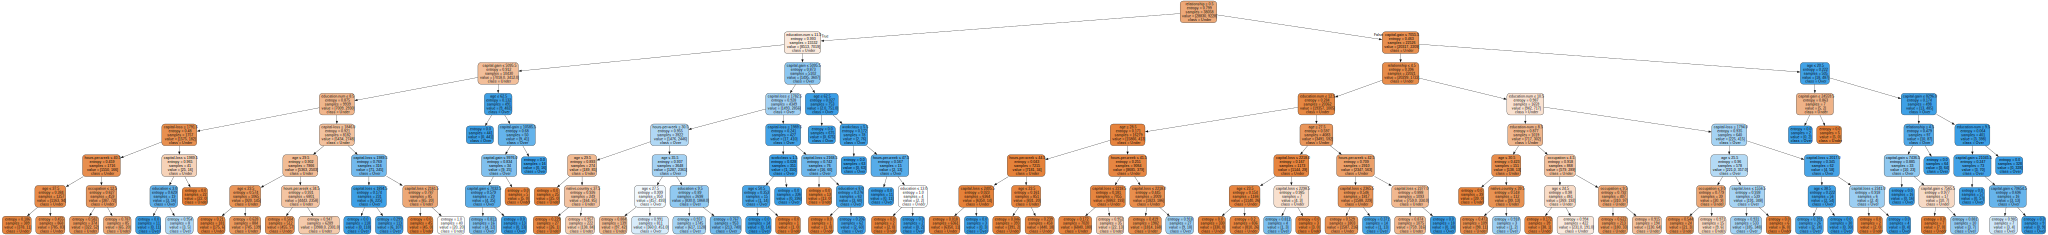

In [349]:
decision_tree(7)

### Accuracy of Decision Tree Classifier for Different `max_depth`

The table below shows the test set accuracy for the Decision Tree Classifier with varying values of `max_depth`. This highlights how the depth of the tree affects its performance.

In [352]:
# Convert accuracy results to DataFrame and set max_depth as index
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df.set_index('max_depth', inplace=True)

# Display the DataFrame
accuracy_df


,accuracy
max_depth,
1,0.757541
2,0.821545
3,0.834157
4,0.838466
5,0.847189
6,0.850236
7,0.851498


### Accuracy vs. max_depth Chart

Below is a chart showing how the accuracy of the Decision Tree Classifier changes with different values of `max_depth`. This visualization helps identify the optimal depth for the model.

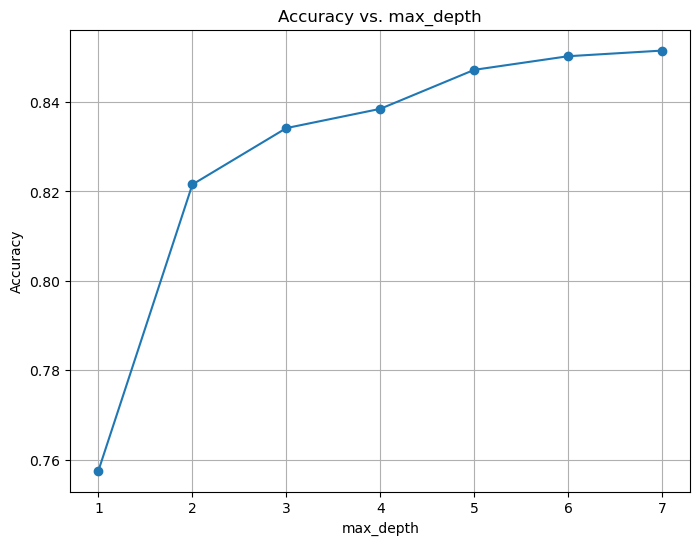

In [355]:
import matplotlib.pyplot as plt

# Plot accuracy vs. max_depth
plt.figure(figsize=(8, 6))
plt.plot(accuracy_df.index, accuracy_df['accuracy'], marker='o', linestyle='-')

# Add labels and title
plt.title("Accuracy vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(accuracy_df.index)
plt.grid(True)
plt.show()


## Insights from Accuracy vs. max_depth Chart

### Observations:
- **Shallow Depths (`max_depth=1` to `max_depth=2`)**:
  - Accuracy starts relatively low at `max_depth=1` (~76%), indicating underfitting as the tree cannot capture sufficient patterns in the data.
  - A significant increase in accuracy is observed at `max_depth=2` (~82%), reflecting better adaptability to the dataset.

- **Intermediate Depths (`max_depth=3` to `max_depth=5`)**:
  - Accuracy stabilizes at a higher range, reaching ~84.7%, suggesting that these depths achieve a good balance between underfitting and overfitting.

- **Deeper Depths (`max_depth=6` to `max_depth=7`)**:
  - Accuracy continues to improve slightly but shows diminishing returns, indicating that additional depth captures more details but does not significantly enhance overall performance.

### Insights:
- **Optimal Depth**: The model achieves optimal accuracy at intermediate depths (`max_depth=3` to `5`), balancing generalization and complexity.
- **Deeper Models**: While deeper models (`max_depth=6` and `7`) achieve slightly higher accuracy, they risk overfitting to the training data without meaningful gains in generalization.

---

## Insights for the Whole Work

### Overall Performance:
- The decision tree classifier achieves robust performance, with high accuracy across all training-test proportions.
- Stratified sampling ensures consistent class distribution, resulting in reliable and balanced evaluation.

### Strengths:
- **High Accuracy**: Intermediate depths (`max_depth=3` to `5`) achieve optimal classification performance, striking a balance between accuracy and generalization.
- **Comprehensive Visualization**: The use of confusion matrices, classification reports, and decision tree plots facilitates detailed interpretation and evaluation.

### Weaknesses:
- **Lower Recall for Over Class**: The "Over" income category consistently shows lower recall and F1-scores compared to the "Under" class.
- **Risk of Overfitting**: At higher depths (`max_depth=6` or more), accuracy gains are minimal, indicating possible overfitting to training data.

### Process Analysis:
- **Data Preparation**:
  - Proper handling of missing values and duplicate rows ensured data quality.
  - Label encoding for categorical variables enabled the dataset to be suitable for tree-based models.
- **Model Evaluation**:
  - Metrics such as precision, recall, F1-score, and accuracy provided comprehensive insights into classifier performance.
  - Hyperparameter tuning (varying `max_depth`) demonstrated the trade-off between complexity and generalization.

### Conclusion:
This work demonstrates the efficacy of decision trees for income classification using the Adult Income dataset. While the model achieves strong results for the majority class ("Under"), future work could focus on improving recall for the minority class ("Over") through advanced methods like ensemble techniques or balanced class sampling. The overall process showcases a well-rounded and methodical approach to supervised learning.
